<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [20]:
X,y=make_moons(n_samples=250, noise=0.05,random_state=42)

In [21]:
X.shape

(250, 2)

In [22]:
y.shape

(250,)

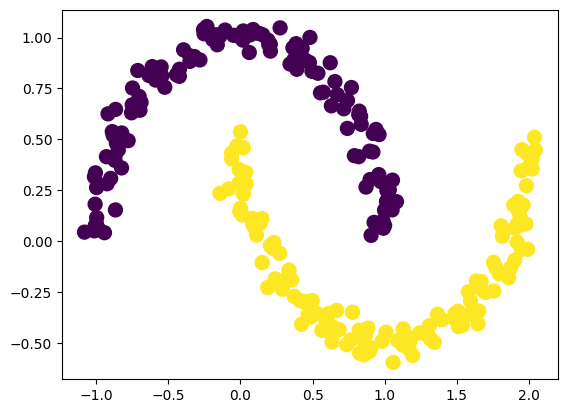

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

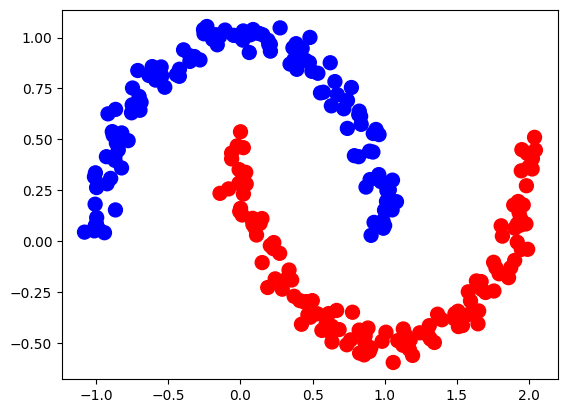

In [24]:
# Define a color map for 0 (blue) and 1 (red)
colors = ['blue', 'red']

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in y], s=100)

# Show the plot
plt.show()

In [25]:
model=Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [27]:
old_weights=model.get_weights()[0] # Weights of first layer

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 4ms/step - loss: 0.7075 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [30]:
new_weights=model.get_weights()[0]

In [31]:
model.optimizer.get_config()["learning_rate"]

0.001

In [32]:
gradient=(old_weights - new_weights)/0.001
percent_change=abs(100*(old_weights - new_weights)/old_weights)

In [33]:
gradient

array([[ -32.853817 , -121.70436  ,  130.78363  ,  -18.35978  ,
          39.85518  ,    6.5205617,  104.85947  ,   13.589322 ,
          -1.0336637,   12.448548 ],
       [  24.15633  ,  103.19268  , -101.20731  ,   16.164124 ,
         -33.918224 ,   -4.4459996,  -84.87463  ,   -9.01518  ,
           0.3531128,  -10.96414  ]], dtype=float32)

In [34]:
percent_change

array([[3.2587494e+01, 3.9821686e+01, 2.6828864e+02, 4.8923292e+00,
        7.6214237e+00, 1.0981759e+01, 3.6203461e+01, 8.2167273e+00,
        5.7663107e-01, 1.9580877e+00],
       [3.8835661e+00, 3.9493690e+01, 1.8758696e+01, 2.7402587e+00,
        2.8339283e+01, 9.5016229e-01, 6.8393791e+01, 8.0508881e+00,
        1.8956648e-01, 6.3877759e+00]], dtype=float32)

In [35]:
old_weights

array([[-0.10081726,  0.30562335, -0.04874736,  0.37527686, -0.52293617,
        -0.0593763 ,  0.28963935, -0.16538608,  0.17925912,  0.63575035],
       [-0.62201416, -0.26128906,  0.5395221 , -0.5898758 , -0.11968625,
        -0.46792004, -0.12409699, -0.11197746, -0.18627387,  0.17164254]],
      dtype=float32)

In [36]:
new_weights

array([[-0.06796344,  0.42732772, -0.179531  ,  0.39363664, -0.56279135,
        -0.06589686,  0.18477988, -0.1789754 ,  0.18029279,  0.6233018 ],
       [-0.6461705 , -0.36448175,  0.6407294 , -0.60603994, -0.08576802,
        -0.46347404, -0.03922235, -0.10296228, -0.18662699,  0.18260668]],
      dtype=float32)

In [51]:
# Now we are using relu as a activation function and it is max(0,z). it solve the vanishing gradient descent problem upto certian limit
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
old_weights=model.get_weights()[0]

In [54]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 5ms/step - loss: 0.6906 - accuracy: 0.7300
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5800
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5350
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6200
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.7650
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.8050
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.8100
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5822 - accuracy: 0.8350
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.8350
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5054 - accuracy: 0.8400
Epoch 11/100
7/7 [===========

In [55]:
new_weights=model.get_weights()[0]

In [56]:
model.optimizer.get_config()['learning_rate']

0.001

In [57]:
gradient=(old_weights - new_weights)/0.001
percent_change=abs(100*(old_weights - new_weights)/old_weights)

In [58]:
gradient

array([[-108.846855,  139.99396 ,  121.540985,  -44.361782,  -15.451282,
         135.25777 ,  132.81085 ,  -14.277398,  -33.843216,  -28.310446],
       [ -96.51738 ,   25.873154, -230.05359 ,  -54.323044,  -75.48242 ,
        -121.332016, -185.57455 ,  -68.74185 , -117.724205,  -33.04144 ]],
      dtype=float32)

In [59]:
percent_change

array([[215.29448  ,  23.776806 ,  74.33166  , 775.62585  ,   8.999996 ,
         25.169144 ,  34.479717 ,   2.7096262,   9.24695  ,  10.434526 ],
       [ 16.557802 ,  11.692894 , 364.0085   ,  15.044468 ,  12.925835 ,
         27.606432 , 959.3435   ,  11.990726 ,  34.401363 , 218.78549  ]],
      dtype=float32)

In [60]:
old_weights

array([[ 0.0505572 , -0.58878374, -0.16351175,  0.00571948, -0.17168099,
        -0.53739524, -0.38518545,  0.52691394,  0.36599332,  0.2713151 ],
       [-0.5829118 ,  0.22127247, -0.06320006,  0.3610832 ,  0.5839656 ,
        -0.43950632, -0.01934391,  0.57329184,  0.34220797, -0.01510221]],
      dtype=float32)

In [61]:
new_weights

array([[ 0.15940405, -0.7287777 , -0.28505275,  0.05008127, -0.1562297 ,
        -0.672653  , -0.5179963 ,  0.54119134,  0.39983654,  0.29962555],
       [-0.4863944 ,  0.19539931,  0.16685355,  0.41540626,  0.659448  ,
        -0.3181743 ,  0.16623065,  0.6420337 ,  0.45993218,  0.01793923]],
      dtype=float32)